In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

print('导入成功')

导入成功


In [2]:
# 网页数据采集测试

u = 'https://movie.douban.com/subject/26100958/comments?start=0&limit=20&sort=new_score&status=P'
r = requests.get(url = u)
r.encoding = 'utf-8'
    # 访问网页
soup = BeautifulSoup(r.text)
    # 解析网页
infor_lst = soup.find('div',id="comments").find_all('div',class_="comment-item")
    # 获取所有招聘标签div
dic = {}
for infor in infor_lst[:1]:
    dic['评论者'] = infor.find('span',class_="comment-info").find('a').text
    dic['评分'] = int(infor.find('span',class_="comment-info").find_all('span')[1]['class'][0][-2:])
    dic['评论时间'] = infor.find('span',class_="comment-time").text.replace(' ','').replace('\n','')
    dic['有用数量'] = int(infor.find('span',class_="votes").text)
    dic['评论内容'] = infor.find('p').text.replace('\n','')

print(dic)

{'评论者': 'Tel', '评分': 40, '评论时间': '2019-04-24', '有用数量': 18930, '评论内容': '我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕；20年前的观众，能在影院里看到指环王系列的终章。影迷们的悲欢并不相通，但现在我们也有了共同的记忆：漫威电影宇宙。谢谢你，《复仇者联盟》。'}


In [3]:
# 构建网页信息获取函数

def get_data(urli):
    try:
        ri = requests.get(url = u)
        ri.encoding = 'utf-8'
            # 访问网页
        soupi = BeautifulSoup(ri.text)
            # 解析网页
        infor_lst = soupi.find('div',id="comments").find_all('div',class_="comment-item")
            # 获取所有招聘标签div
        datalsti = []
        for infor in infor_lst[:]:
            dic = {}
            dic['评论者'] = infor.find('span',class_="comment-info").find('a').text
            dic['评分'] = int(infor.find('span',class_="comment-info").find_all('span')[1]['class'][0][-2:])
            dic['评论时间'] = infor.find('span',class_="comment-time").text.replace(' ','').replace('\n','')
            dic['有用数量'] = int(infor.find('span',class_="votes").text)
            dic['评论内容'] = infor.find('p').text.replace('\n','')
            datalsti.append(dic)
        return datalsti
    except:
        return []

u = 'https://movie.douban.com/subject/26100958/comments?start=0&limit=20&sort=new_score&status=P'
get_data(u)[:2]

[{'评论者': 'Tel',
  '评分': 40,
  '评论时间': '2019-04-24',
  '有用数量': 18930,
  '评论内容': '我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕；20年前的观众，能在影院里看到指环王系列的终章。影迷们的悲欢并不相通，但现在我们也有了共同的记忆：漫威电影宇宙。谢谢你，《复仇者联盟》。'},
 {'评论者': '深夜的阿斯伯格',
  '评分': 40,
  '评论时间': '2019-04-24',
  '有用数量': 6202,
  '评论内容': '对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）'}]

In [4]:
# 构建获取页面url函数

def get_urls(n):
    urllst = []
    for i in range(n):
        urllst.append('https://movie.douban.com/subject/26100958/comments?start=%i&limit=20&sort=new_score&status=P' % (i*20))
    return urllst

urllsts = get_urls(50)
urllsts[:2]

['https://movie.douban.com/subject/26100958/comments?start=0&limit=20&sort=new_score&status=P',
 'https://movie.douban.com/subject/26100958/comments?start=20&limit=20&sort=new_score&status=P']

In [5]:
# 批量获取数据

datalst = []
n = 1
for u in urllsts:
    datalst.extend(get_data(u))
    print('成功获取%i条数据' % (n*20))
    n += 1

datalst[:2]

成功获取20条数据
成功获取40条数据
成功获取60条数据
成功获取80条数据
成功获取100条数据
成功获取120条数据
成功获取140条数据
成功获取160条数据
成功获取180条数据
成功获取200条数据
成功获取220条数据
成功获取240条数据
成功获取260条数据
成功获取280条数据
成功获取300条数据
成功获取320条数据
成功获取340条数据
成功获取360条数据
成功获取380条数据
成功获取400条数据
成功获取420条数据
成功获取440条数据
成功获取460条数据
成功获取480条数据
成功获取500条数据
成功获取520条数据
成功获取540条数据
成功获取560条数据
成功获取580条数据
成功获取600条数据
成功获取620条数据
成功获取640条数据
成功获取660条数据
成功获取680条数据
成功获取700条数据
成功获取720条数据
成功获取740条数据
成功获取760条数据
成功获取780条数据
成功获取800条数据
成功获取820条数据
成功获取840条数据
成功获取860条数据
成功获取880条数据
成功获取900条数据
成功获取920条数据
成功获取940条数据
成功获取960条数据
成功获取980条数据
成功获取1000条数据


[{'评论者': 'Tel',
  '评分': 40,
  '评论时间': '2019-04-24',
  '有用数量': 18930,
  '评论内容': '我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕；20年前的观众，能在影院里看到指环王系列的终章。影迷们的悲欢并不相通，但现在我们也有了共同的记忆：漫威电影宇宙。谢谢你，《复仇者联盟》。'},
 {'评论者': '深夜的阿斯伯格',
  '评分': 40,
  '评论时间': '2019-04-24',
  '有用数量': 6202,
  '评论内容': '对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）'}]

In [6]:
# 数据格式转换

df = pd.DataFrame(datalst)
df.iloc[:10]

,有用数量,评分,评论内容,评论时间,评论者
0,18930,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel
1,6202,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格
2,5906,40,用三个小时的时间，与大家告别。是集结，是重聚，是告别，是牺牲。作为系列的最终篇，确实已经努力...,2019-04-24,桃桃林林
3,34711,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海
4,14841,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿
5,5613,40,搞不懂惊队吹这么久是为什么啥……感觉就是打了个酱油🙄🙄🙄,2019-04-24,sunmmr丶sea
6,13229,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe
7,13036,50,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,2019-04-24,。
8,14169,30,不打感情分也就合格水准，通篇流水账观感还不如第三部，虽然我一直认为这类片无所谓剧透，不过为了...,2019-04-24,小轨
9,11930,50,谁能想到是一只老鼠拯救了地球呢？,2019-04-24,KarSa


,有用数量,评分,评论内容,评论时间,评论者,评论字数
0,18930,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
1,6202,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格,40
2,5906,40,用三个小时的时间，与大家告别。是集结，是重聚，是告别，是牺牲。作为系列的最终篇，确实已经努力...,2019-04-24,桃桃林林,80
3,34711,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
4,14841,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335


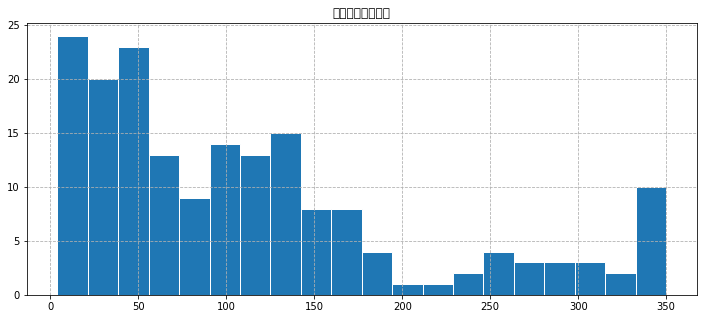

In [7]:
# 评论字数数据分布

df['评论字数'] = df['评论内容'].str.len()

plt.figure(figsize = (12,5))
plt.title('评论字数数据分布')
df['评论字数'].hist(bins = 20,edgecolor = 'white')
plt.grid(linestyle='--')

df.head()

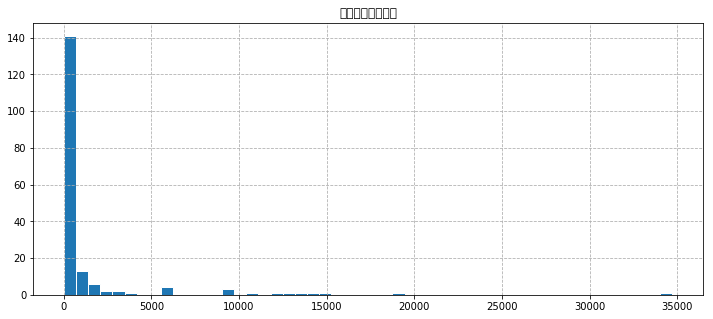

In [8]:
# 有用数量数据分布

plt.figure(figsize = (12,5))
plt.title('有用数量数据分布')
df['有用数量'].hist(bins = 50,edgecolor = 'white')
plt.grid(linestyle='--')

,有用数量,评分,评论内容,评论时间,评论者,评论字数
3,34711,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
0,18930,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
4,14841,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335
8,14169,30,不打感情分也就合格水准，通篇流水账观感还不如第三部，虽然我一直认为这类片无所谓剧透，不过为了...,2019-04-24,小轨,128
6,13229,50,钢铁侠成为了美队，美队活成了钢铁侠。,2019-04-24,Rafe,18
7,13036,50,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,2019-04-24,。,39
9,11930,50,谁能想到是一只老鼠拯救了地球呢？,2019-04-24,KarSa,16
10,10941,50,“I AM IRONMAN! ”既是开始也是结束。谢谢钢铁侠，谢谢漫威给我们带来的欢笑、泪水...,2019-04-24,昊昊的说。,64
11,9538,50,五星全给黑寡妇，她是最伟大的复仇者！！！,2019-04-24,X教授的傻儿子,20
15,9508,50,I AM IRONMAN.,2019-04-24,雁落孤山,13


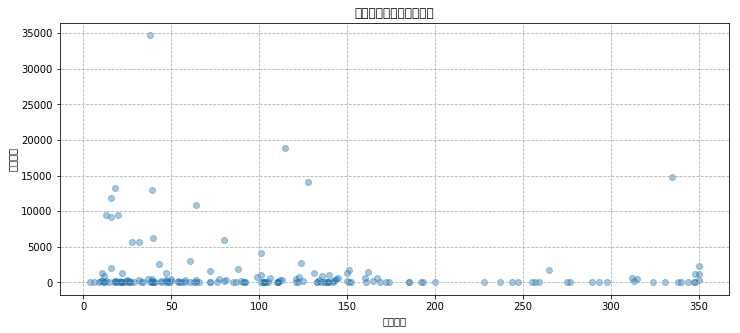

In [9]:
# 评论字数与有用数量关系

plt.figure(figsize = (12,5))
plt.title('评论字数与有用数量关系')
plt.scatter(df['评论字数'],df['有用数量'],alpha = 0.4)
plt.xlabel('评论字数')
plt.ylabel('有用数量')
plt.grid(linestyle='--')

df[df['有用数量']>5000].sort_values(by = '有用数量',ascending = False)

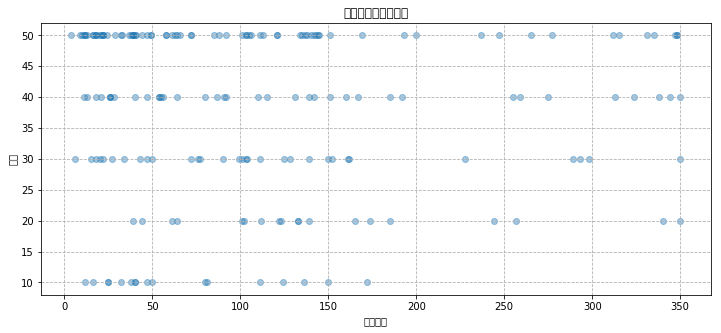

In [10]:
# 评论字数与评分关系

plt.figure(figsize = (12,5))
plt.title('评论字数与评分关系')
plt.scatter(df['评论字数'],df['评分'],alpha = 0.4)
plt.xlabel('评论字数')
plt.ylabel('评分')
plt.grid(linestyle='--')

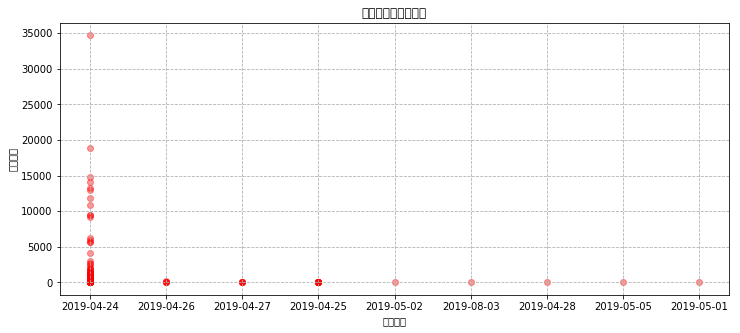

In [11]:
# 评论时间与有用数量关系

plt.figure(figsize = (12,5))
plt.title('评论时间与有用数量')
plt.scatter(df['评论时间'],df['有用数量'],alpha = 0.4,color='red')
plt.xlabel('评论时间')
plt.ylabel('有用数量')
plt.grid(linestyle='--')

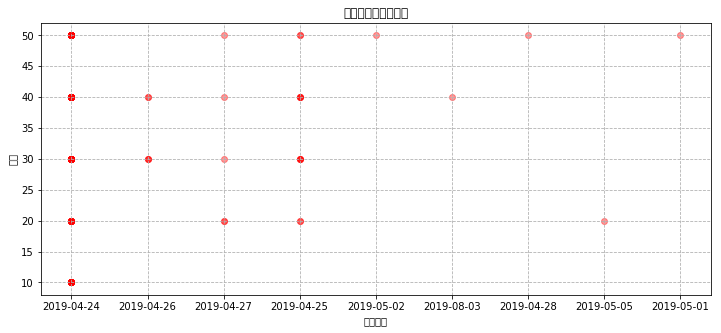

In [12]:
# 评论时间与评分关系

plt.figure(figsize = (12,5))
plt.title('评论时间与评分关系')
plt.scatter(df['评论时间'],df['评分'],alpha = 0.4,color='red')
plt.xlabel('评论时间')
plt.ylabel('评分')
plt.grid(linestyle='--')

### 3、关键人物分析

In [13]:
df.head()

,有用数量,评分,评论内容,评论时间,评论者,评论字数
0,18930,40,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,2019-04-24,Tel,115
1,6202,40,对某人而言这就叫有始有终吧，这个时代的星战（90后终于有长达十年的情怀和回忆了）,2019-04-24,深夜的阿斯伯格,40
2,5906,40,用三个小时的时间，与大家告别。是集结，是重聚，是告别，是牺牲。作为系列的最终篇，确实已经努力...,2019-04-24,桃桃林林,80
3,34711,50,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,2019-04-24,棠枫海,38
4,14841,50,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,2019-04-24,凌睿,335


In [14]:
keyword = '灭霸'
n = 0
for i in df['评论内容']:
    if keyword in i:
        n += 1
print(len(df))
print(n)

180
14


In [16]:
# 创建函数查找文字出现次数

def name_count(namei,s):
    n = 0
    for i in s:
        if namei in i:
            n += 1
    return n

name_count('美队',df['评论内容'])

13

In [17]:
namelst = ['美队','钢铁侠','灭霸','黑寡妇','雷神','浩克','惊奇队长',
            '鹰眼','蚁人','奇异博士','蜘蛛侠','星云','黑豹']
            
for i in namelst:
    print(i,name_count(i,df['评论内容']))

美队 13
钢铁侠 16
灭霸 14
黑寡妇 8
雷神 13
浩克 2
惊奇队长 12
鹰眼 5
蚁人 8
奇异博士 2
蜘蛛侠 1
星云 2
黑豹 1


In [18]:
# 计算不同关键字出现频率

namelst = ['美队','钢铁侠','灭霸','黑寡妇','雷神','浩克','惊奇队长',
            '鹰眼','蚁人','奇异博士','蜘蛛侠','星云','黑豹']

lst = []
for namei in namelst:
    lst.append({'关键词': namei,'出现频率': name_count(namei,df['评论内容'])})

lst

[{'关键词': '美队', '出现频率': 13},
 {'关键词': '钢铁侠', '出现频率': 16},
 {'关键词': '灭霸', '出现频率': 14},
 {'关键词': '黑寡妇', '出现频率': 8},
 {'关键词': '雷神', '出现频率': 13},
 {'关键词': '浩克', '出现频率': 2},
 {'关键词': '惊奇队长', '出现频率': 12},
 {'关键词': '鹰眼', '出现频率': 5},
 {'关键词': '蚁人', '出现频率': 8},
 {'关键词': '奇异博士', '出现频率': 2},
 {'关键词': '蜘蛛侠', '出现频率': 1},
 {'关键词': '星云', '出现频率': 2},
 {'关键词': '黑豹', '出现频率': 1}]

In [19]:
pd.DataFrame(lst)

,关键词,出现频率
0,美队,13
1,钢铁侠,16
2,灭霸,14
3,黑寡妇,8
4,雷神,13
5,浩克,2
6,惊奇队长,12
7,鹰眼,5
8,蚁人,8
9,奇异博士,2


In [20]:
result = pd.DataFrame(lst)
result.to_csv('result.csv')

In [21]:
for i in lst:
    print(i['关键词'],' ',i['出现频率'])

美队   13
钢铁侠   16
灭霸   14
黑寡妇   8
雷神   13
浩克   2
惊奇队长   12
鹰眼   5
蚁人   8
奇异博士   2
蜘蛛侠   1
星云   2
黑豹   1
